In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris,load_boston
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

## 1.1 分类决策树

In [2]:
#鸢尾花数据的分类问题
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()#定义分类决策树
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)#分割训练和测试数据集
clf = clf.fit(X_train, y_train)
#打印在测试集上的指标
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



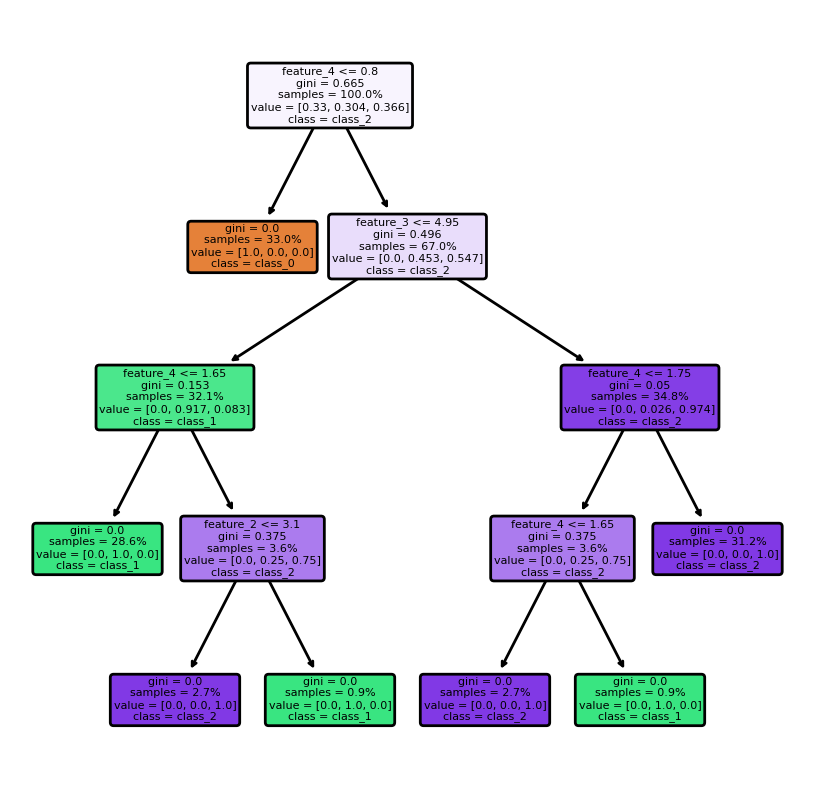

In [3]:
#分类决策树的可视化
fig=plt.figure(dpi=200,figsize=(5,5))
ax=fig.add_subplot(111)
_=tree.plot_tree(clf,ax=ax,filled=True,rounded=True,proportion=True,feature_names=['feature_1','feature_2','feature_3','feature_4'],\
                 class_names=['class_0','class_1','class_2'],fontsize=4)#相同颜色代表同一类，颜色越深代表是此类的概率越大

In [4]:
print(tree.export_text(clf))#使用字符展示分类决策树

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



## 1.2 回归决策树

In [5]:
#对波士顿房价的预测
boston = load_boston()#波士顿房价数据
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)#分割训练和测试数据集
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeRegressor()#定义分类决策树
param_grid={
            'max_depth':[2,5,10,20],
            'min_samples_split':[2,5,10,20],
            'max_leaf_nodes':[2,5,10,20],
            'min_samples_leaf':[2,5,10,20]
            }
grid = GridSearchCV(estimator=clf,param_grid=param_grid)#使用网格搜索得到最佳模型参数
_=grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
best=grid.best_estimator_
print('训练集上的分数:{:.5f}'.format(best.score(X_train,y_train)))
print('测试集上的分数:{:.5f}'.format(best.score(X_test,y_test)))

0.7324696473963529
{'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
训练集上的分数:0.85064
测试集上的分数:0.72508


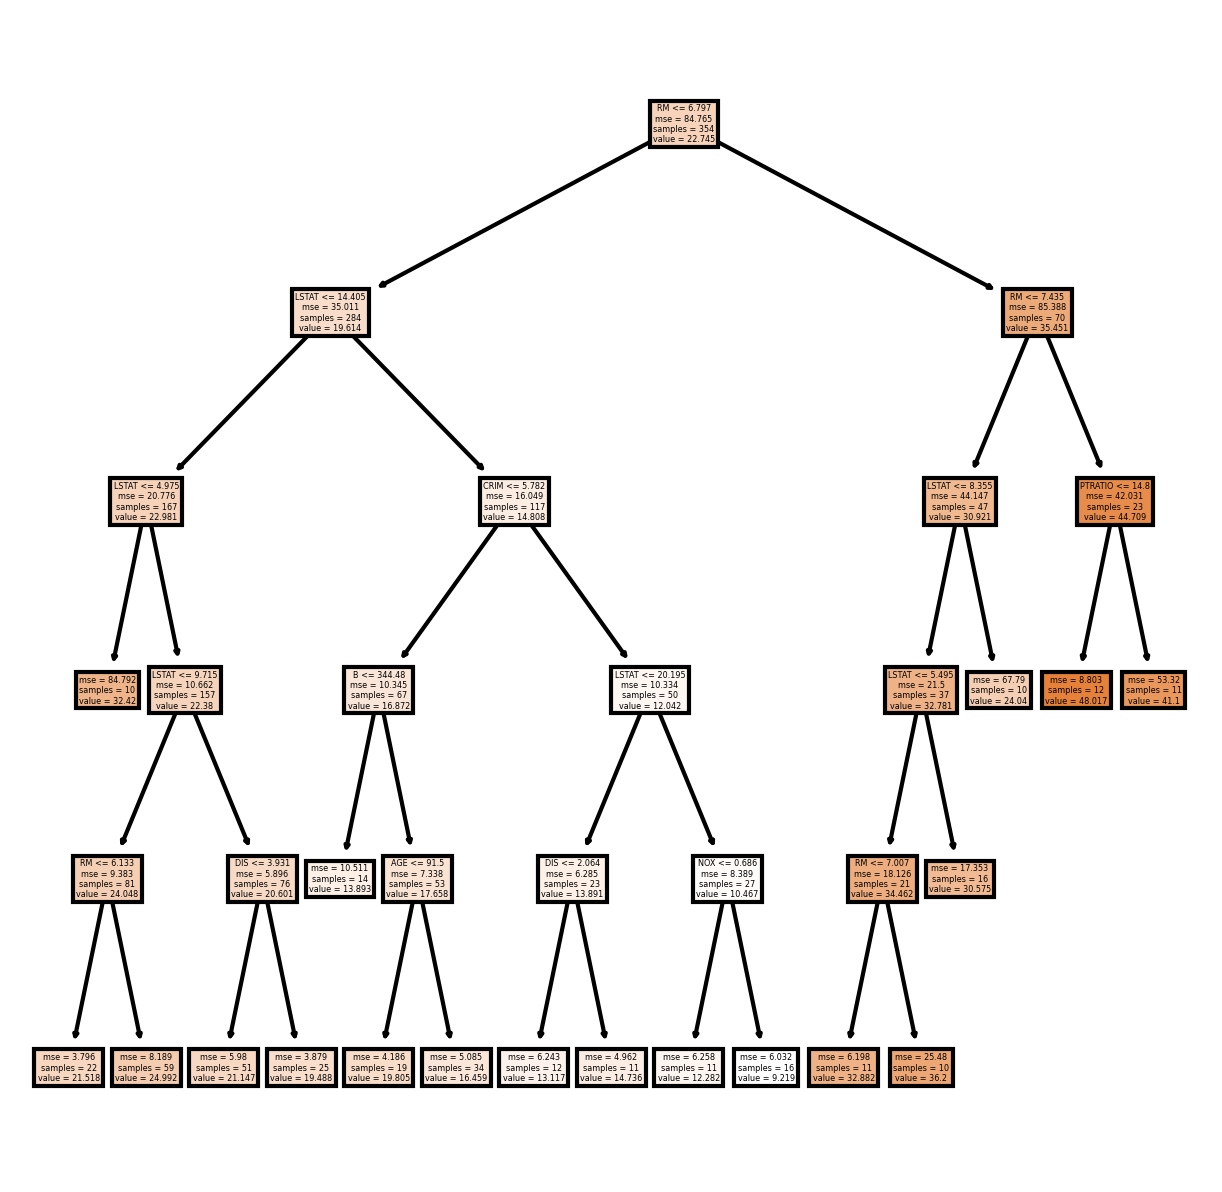

In [6]:
#分类决策树的可视化
fig=plt.figure(dpi=300,figsize=(5,5))
ax=fig.add_subplot(111)
_=tree.plot_tree(best,ax=ax,filled=True,feature_names=boston.feature_names)

# **To Do: 上边得到的回归模型的泛化能力还有待提高**